In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime
from itertools import product
import warnings
from scipy import stats
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset\XAU_1d_data_2004_to_2024-09-20.csv')
df.head()

,Date,Time,Open,High,Low,Close,Volume
0,2004.06.11,00:00,384.0,384.8,382.8,384.1,272
1,2004.06.14,00:00,384.3,385.8,381.8,382.8,1902
2,2004.06.15,00:00,382.8,388.8,381.1,388.6,1951
3,2004.06.16,00:00,387.1,389.8,382.6,383.8,2014
4,2004.06.17,00:00,383.6,389.3,383.0,387.6,1568


In [3]:
df.tail()

,Date,Time,Open,High,Low,Close,Volume
5200,2024.09.10,00:00,2506.13,2518.37,2500.15,2516.71,75158
5201,2024.09.11,00:00,2516.59,2528.88,2501.15,2512.27,81323
5202,2024.09.12,00:00,2512.06,2560.12,2511.01,2559.03,79038
5203,2024.09.13,00:00,2558.19,2586.09,2556.74,2580.30,82666
5204,2024.09.19,00:00,2592.20,2593.39,2591.51,2592.29,8253


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(df['Date'], inplace = True)
df.isna().sum()

Date      0
Time      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
df = df[-1500:]
numeric_df = df.select_dtypes(include=["number"])
df_day = numeric_df.resample('D').mean()
df_month = numeric_df.resample('M').mean()
df_year = numeric_df.resample('A-DEC').mean()
df_Q = numeric_df.resample('Q-DEC').mean()

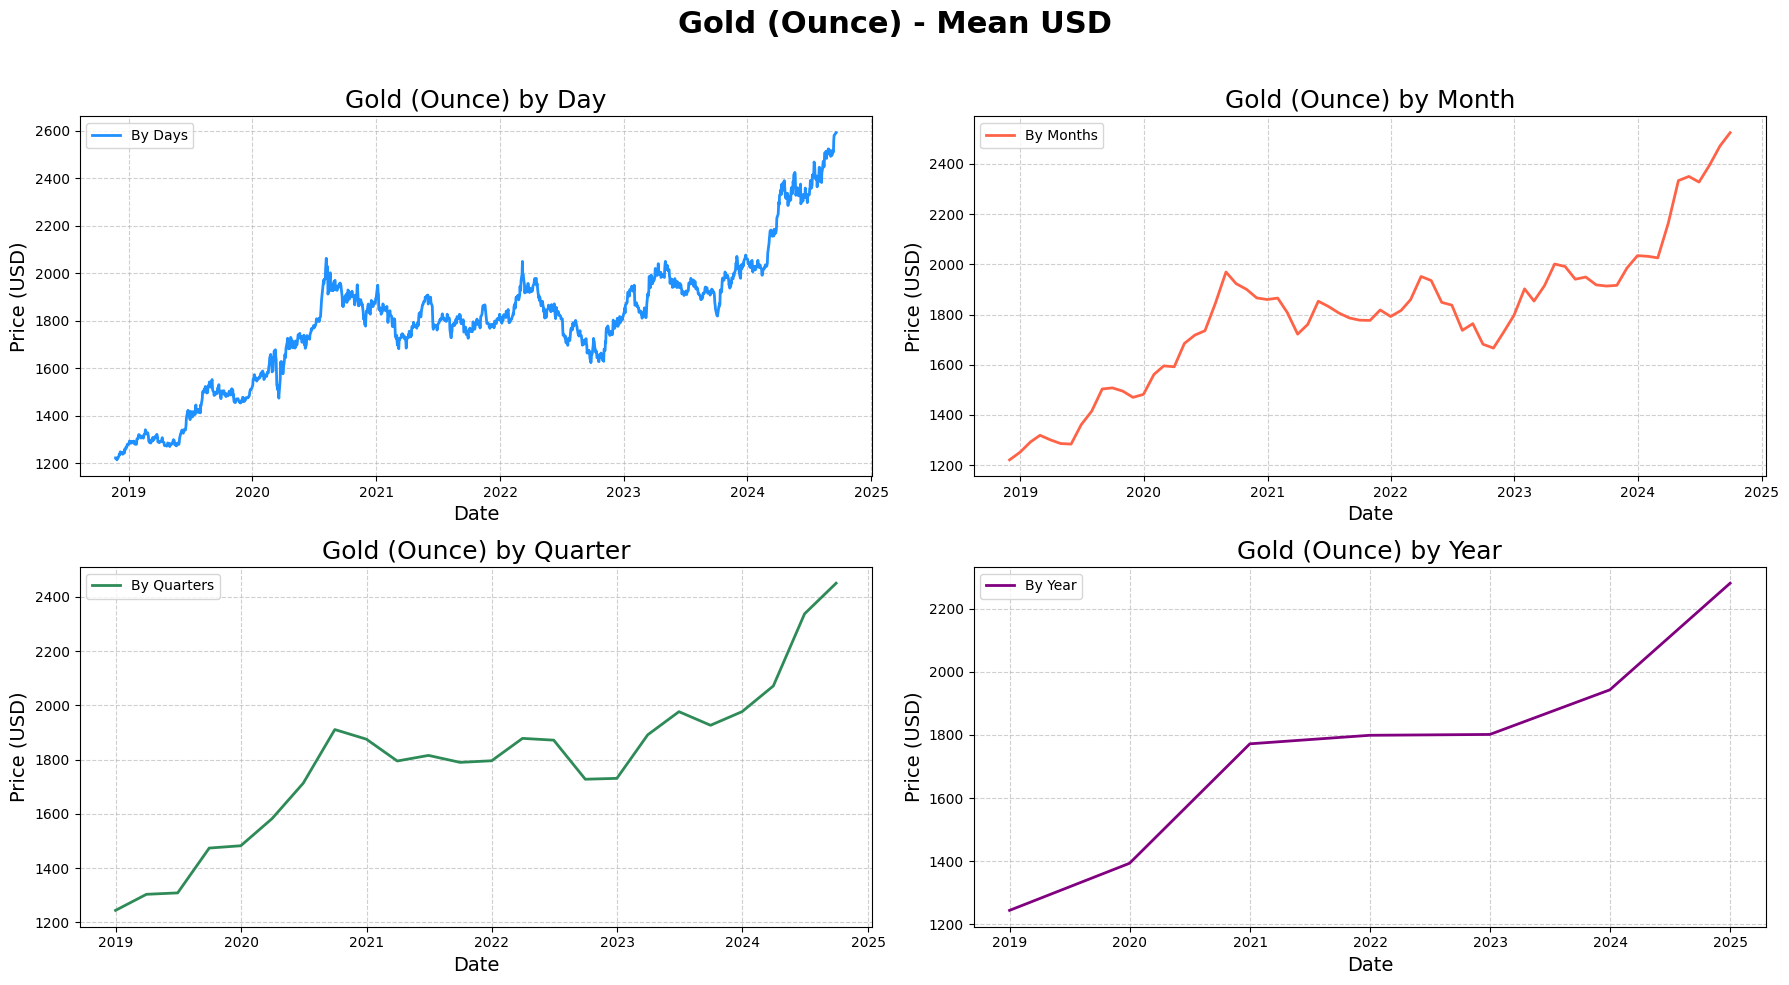

In [6]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=[18, 10])
plt.suptitle('Gold (Ounce) - Mean USD', fontsize=22, fontweight='bold')


plt.subplot(221)
plt.plot(df['Close'], '-', label='By Days', color='dodgerblue', linewidth=2)
plt.title('Gold (Ounce) by Day', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(222)
plt.plot(df_month['Close'], '-', label='By Months', color='tomato', linewidth=2)
plt.title('Gold (Ounce) by Month', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(223)
plt.plot(df_Q['Close'], '-', label='By Quarters', color='seagreen', linewidth=2)
plt.title('Gold (Ounce) by Quarter', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(224)
plt.plot(df_year['Close'], '-', label='By Year', color='purple', linewidth=2)
plt.title('Gold (Ounce) by Year', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)


plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

The Dickey–Fuller test p-value is: 0.91010
The series is not stationary.


<Figure size 1700x600 with 0 Axes>

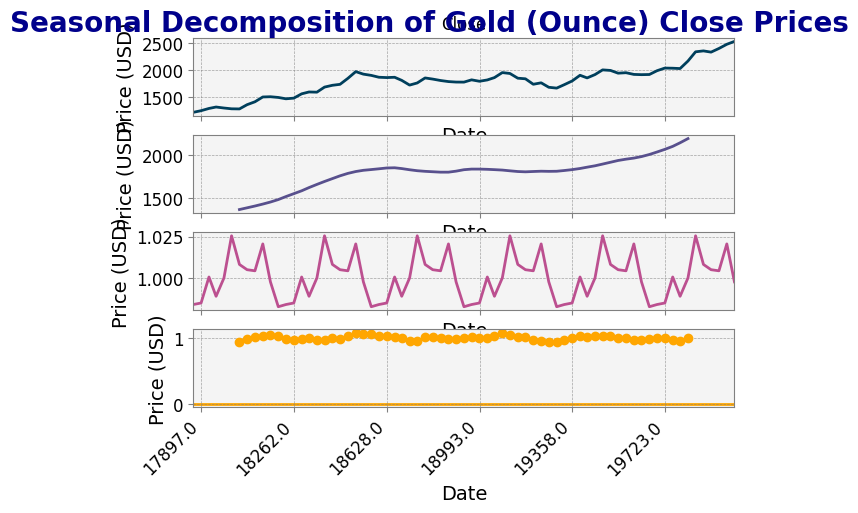

In [7]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.figure(figsize=[17, 6])

result = sm.tsa.seasonal_decompose(df_month['Close'], model='multiplicative', period=12)

result.plot()
plt.suptitle('Seasonal Decomposition of Gold (Ounce) Close Prices', fontsize=20, fontweight='bold', color='darkblue')
plt.subplots_adjust(top=0.92, bottom=0.15)  

colors = ['#003f5c', '#58508d', '#bc5090', '#ffa600']
for ax, color in zip(plt.gcf().get_axes(), colors):
    ax.set_facecolor('#f4f4f4')  # Light background
    ax.tick_params(axis='both', labelsize=12, color='gray')
    ax.set_xlabel('Date', fontsize=14, color='black')
    ax.set_ylabel('Price (USD)', fontsize=14, color='black')
    for spine in ax.spines.values():
        spine.set_color('gray')
    ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    for line in ax.lines:
        line.set_color(color)
        line.set_linewidth(2)


    ax.set_xticklabels(ax.get_xticks(), rotation=45, ha='right')

adf_test_result = sm.tsa.stattools.adfuller(df_month['Close'])[1]
print(f'The Dickey–Fuller test p-value is: {adf_test_result:.5f}')
if adf_test_result > 0.05:
    print('The series is not stationary.')
else:
    print('The series is stationary.')

plt.show()

In [8]:
df_month['Close_box'], lmbda = stats.boxcox(df_month.Close)
print(f'The Dickey–Fuller test is: {sm.tsa.stattools.adfuller(df_month.Close_box)[1]}')
print('Not stationary')

The Dickey–Fuller test is: 0.8804966354984965
Not stationary


In [9]:
df_month['Close_box_diff'] = df_month.Close_box - df_month.Close_box.shift(12)
print("The Dickey–Fuller test is: %f" % sm.tsa.stattools.adfuller(df_month.Close_box_diff[12:])[1])
print('Still not stationary')

The Dickey–Fuller test is: 0.709667
Still not stationary


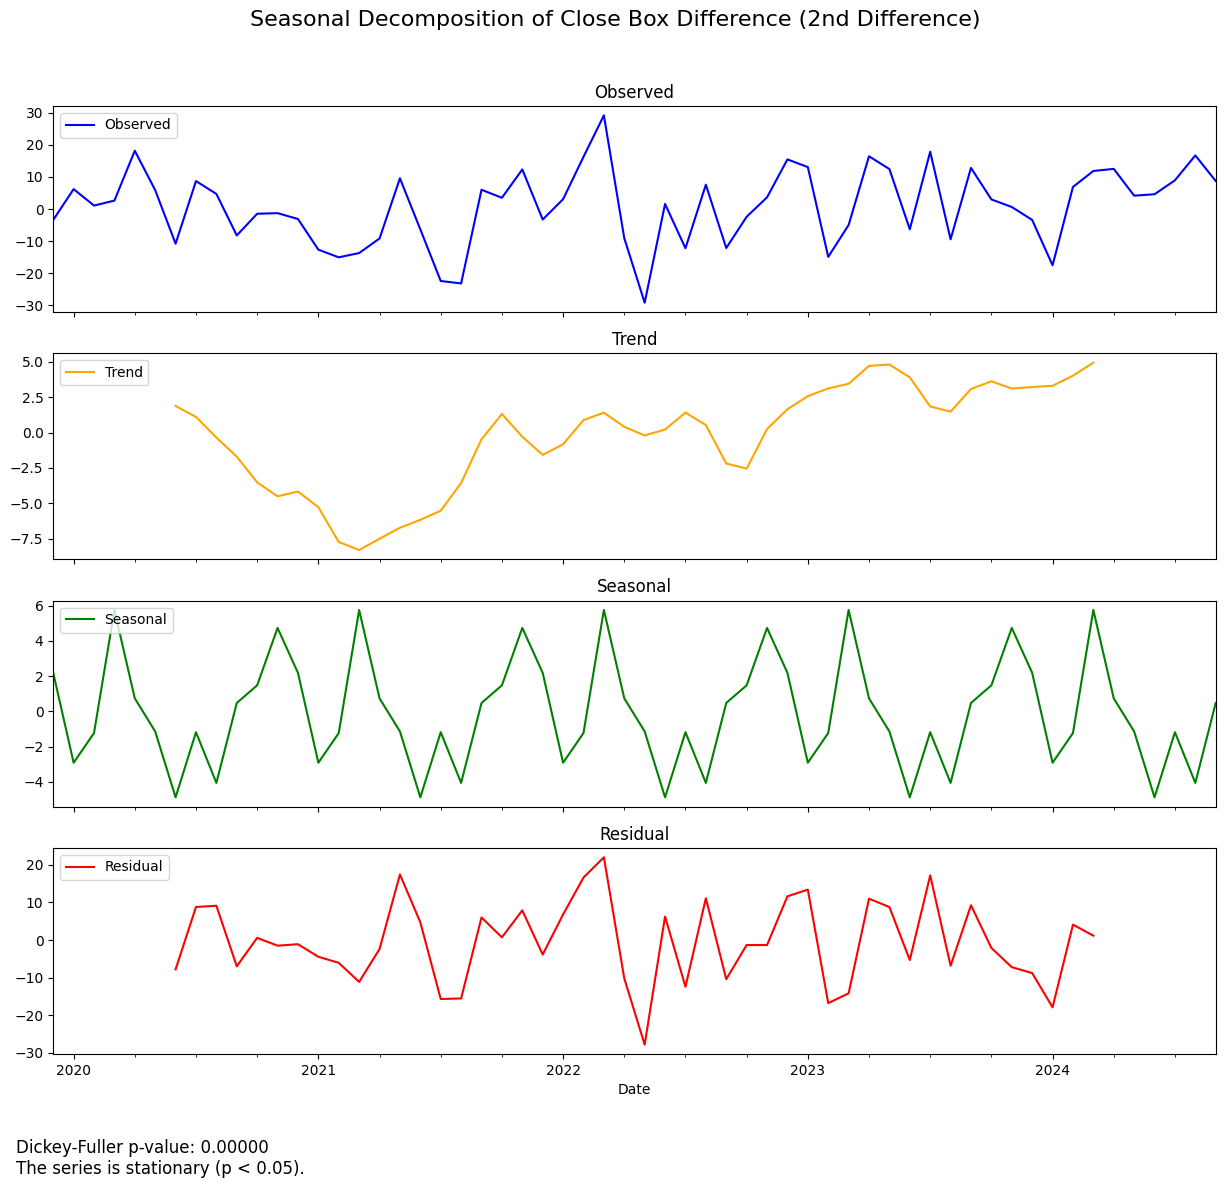

In [10]:
df_month['Close_box_diff2'] = df_month.Close_box_diff - df_month.Close_box_diff.shift(1)


adf_result = sm.tsa.stattools.adfuller(df_month.Close_box_diff2[13:])
p_value = adf_result[1]


if p_value < 0.05:
    stationarity_message = "The series is stationary (p < 0.05)."
else:
    stationarity_message = "The series is not stationary (p >= 0.05)."


result = sm.tsa.seasonal_decompose(df_month.Close_box_diff2[13:], model='additive', period=12)


fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)


result.observed.plot(ax=axes[0], color='blue', label='Observed')
axes[0].set_title('Observed')
axes[0].legend(loc='upper left')

result.trend.plot(ax=axes[1], color='orange', label='Trend')
axes[1].set_title('Trend')
axes[1].legend(loc='upper left')

result.seasonal.plot(ax=axes[2], color='green', label='Seasonal')
axes[2].set_title('Seasonal')
axes[2].legend(loc='upper left')

result.resid.plot(ax=axes[3], color='red', label='Residual')
axes[3].set_title('Residual')
axes[3].legend(loc='upper left')


plt.suptitle('Seasonal Decomposition of Close Box Difference (2nd Difference)', fontsize=16)


plt.subplots_adjust(top=0.9)  # Adjust the title to not overlap with plots

# Display Dickey-Fuller test result at the bottom of the figure
plt.figtext(0.1, 0.01, f'Dickey-Fuller p-value: {p_value:.5f}\n{stationarity_message}', fontsize=12)


plt.show()

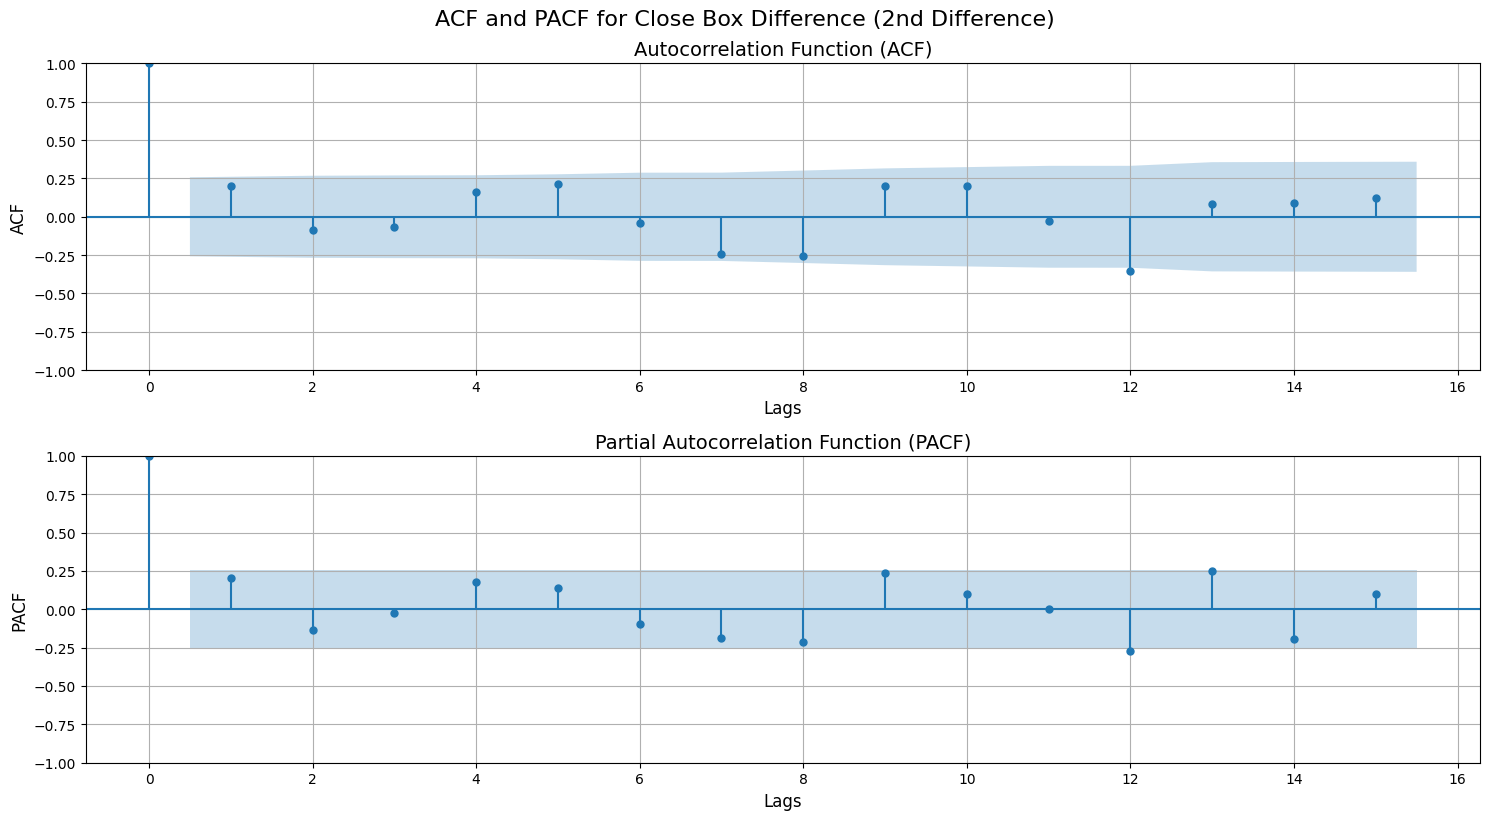

In [11]:
import matplotlib.pyplot as plt
import statsmodels.api as sm


plt.figure(figsize=(15, 8))


ax1 = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.Close_box_diff2[13:].values.squeeze(), lags=15, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)', fontsize=14)
ax1.set_xlabel('Lags', fontsize=12)
ax1.set_ylabel('ACF', fontsize=12)
ax1.grid(True)

# Create the PACF plot
ax2 = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.Close_box_diff2[13:].values.squeeze(), lags=15, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)', fontsize=14)
ax2.set_xlabel('Lags', fontsize=12)
ax2.set_ylabel('PACF', fontsize=12)
ax2.grid(True)


plt.tight_layout()


plt.suptitle('ACF and PACF for Close Box Difference (2nd Difference)', fontsize=16, y=1.02)
plt.show()

In [12]:
import warnings
import statsmodels.api as sm
from itertools import product

# Set up parameter ranges for the SARIMAX grid search
Qs = range(0, 2)  # Seasonal AR order
qs = range(0, 3)  # Non-seasonal AR order
Ps = range(0, 3)  # Seasonal MA order
ps = range(0, 3)  # Non-seasonal MA order

# Seasonal difference (D) and non-seasonal difference (d) values
D = 1
d = 1

# Generate all combinations of parameters for SARIMAX
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)

# Initialize variables to store the best model and results
best_aic = float("inf")
best_model = None
best_param = None
results = []

# Suppress warnings during the search to keep the output clean
warnings.filterwarnings('ignore')

# Grid search for optimal SARIMAX parameters
for param in parameters_list:
    try:
        # Fit the SARIMAX model with current parameter combination
        model = sm.tsa.statespace.SARIMAX(df_month.Close_box, 
                                          order=(param[0], d, param[1]), 
                                          seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
        
        # Extract the AIC of the current model
        aic = model.aic
        
        # If the current model has a lower AIC, update the best model
        if aic < best_aic:
            best_aic = aic
            best_model = model
            best_param = param
        
        
        results.append([param, aic])
    
    except ValueError as e:
     
        print(f"Error with parameters {param}: {e}")
        continue

# Display the best parameter combination and corresponding AIC
print(f"Best AIC: {best_aic} with parameters: {best_param}")

Best AIC: 438.8611652139675 with parameters: (0, 1, 0, 1)


Dickey–Fuller test:: p=0.000000


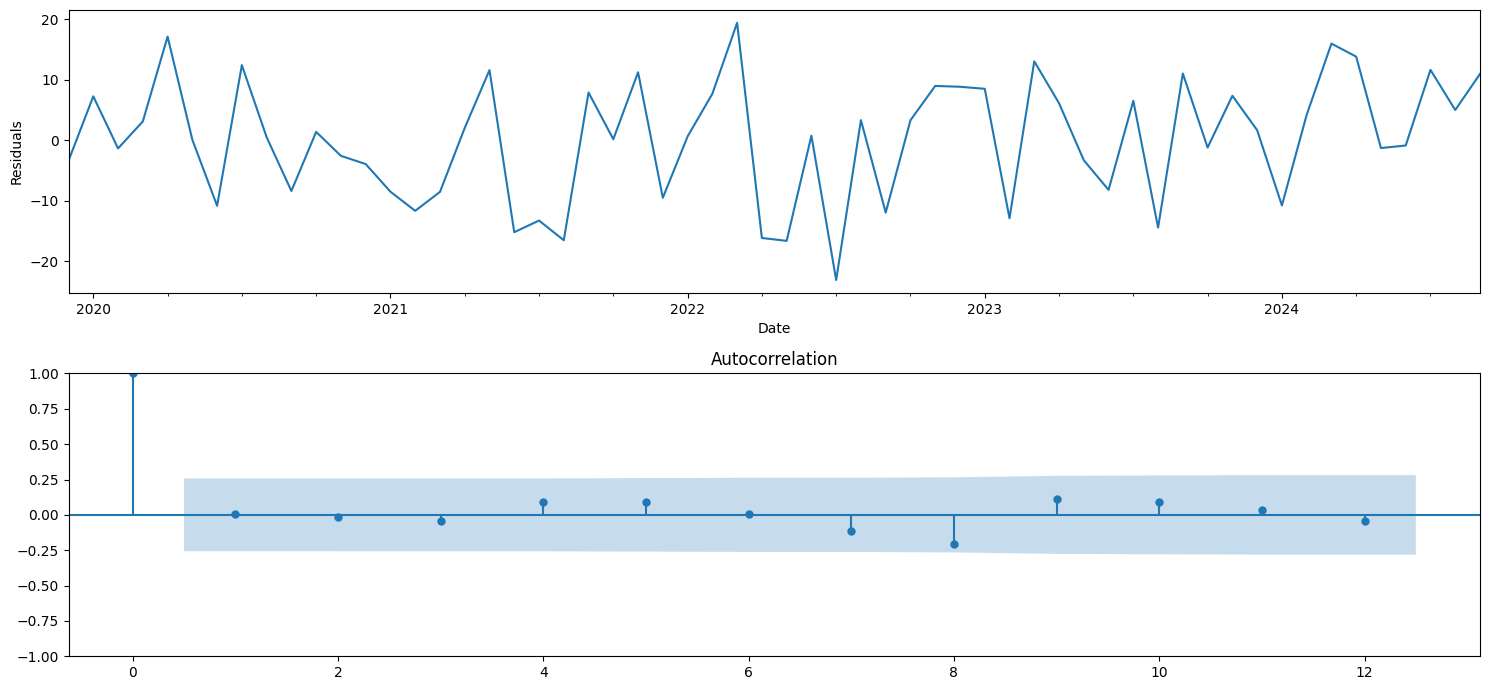

In [13]:
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=12, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

In [14]:
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

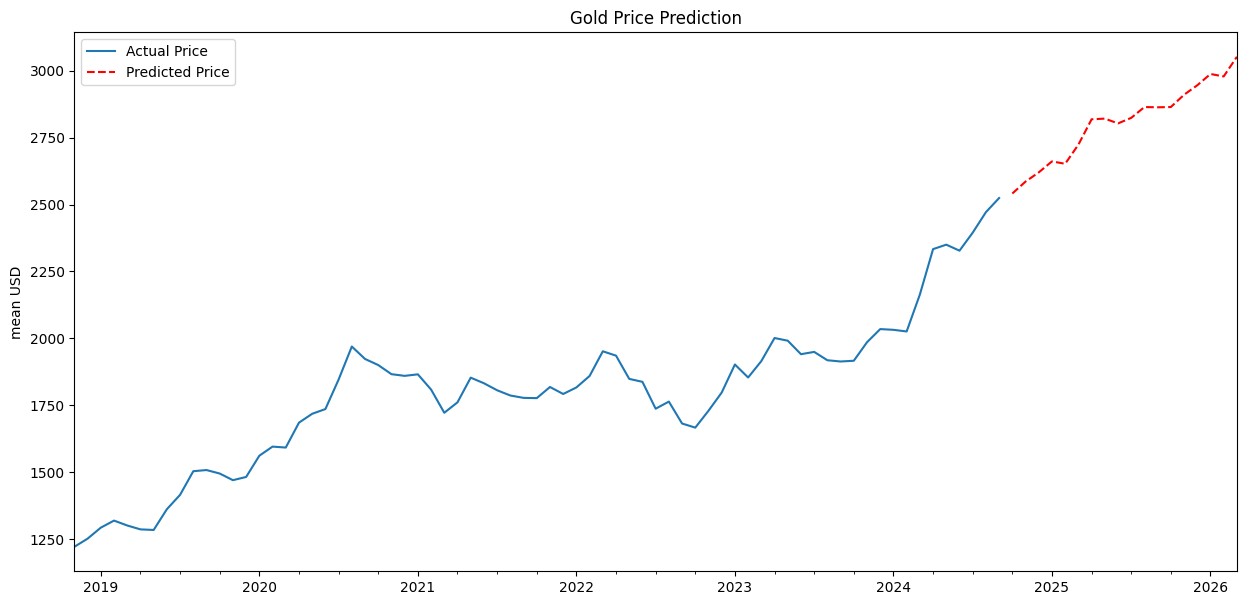

In [15]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Ensure you're working with a clean copy of the original data
df_month2 = df_month[['Close']].copy()

# Forecast range
forecast_start_date = df_month2.index.max() + pd.DateOffset(months=1)
forecast_end_date = datetime(2026, 3, 31)
future_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='M')

# Predict for the number of months in the future
n_periods = len(future_dates)

# Forecast future values only
forecast_values = invboxcox(best_model.predict(start=len(df_month2), end=len(df_month2)+n_periods-1), lmbda)

# Create forecast DataFrame
forecast_df = pd.DataFrame(index=future_dates, data={'forecast': forecast_values})

# Combine original with forecast
df_combined = pd.concat([df_month2, forecast_df], axis=0)

# Plot
plt.figure(figsize=(15,7))
df_combined['Close'].plot(label='Actual Price')
df_combined['forecast'].plot(color='r', ls='--', label='Predicted Price')
plt.legend()
plt.title('Gold Price Prediction')
plt.ylabel('mean USD')
plt.show()


In [16]:
from datetime import datetime
from scipy.special import inv_boxcox  # just in case you meant this

def predict_gold_price_for_date(target_date, model, df, lmbda):
    # Get the last date from your actual data
    last_date = df.index.max()
    
    # Calculate how many months ahead the target date is
    months_ahead = (target_date.year - last_date.year) * 12 + (target_date.month - last_date.month)

    if months_ahead <= 0:
        raise ValueError("Selected date is not in the future.")
    
    # Predict the price for that specific month
    forecast = model.predict(start=len(df), end=len(df) + months_ahead - 1)
    
    # Convert back from Box-Cox if needed
    gold_price = invboxcox(forecast[-1], lmbda)
    
    return round(gold_price, 2)

In [18]:
target = datetime(2025, 3, 15)
price = predict_gold_price_for_date(target, best_model, df_month, lmbda)
print(f"📈 Predicted gold price for {target.strftime('%B %Y')}: ${price}")

📈 Predicted gold price for March 2025: $2723.58
